## Introduction

In this notebook we are going to do a very trivial task of finding a next odd number given a input sequence. That is, if the input sequence is 35, 37 our model should predict 39 as output. The goal of this notebook is to observe how a neural network is learning and see why choosing a right hyperparameter matters.



## Good model is all about good selection of features, number of layers, learning rate and other hyperparameter 

When we start designing a neural network system much of the task is to determine right amount of layers, the right amount to hyperparamters. There is a very little chance that we will get good results in our first attempt if we start to choose hyperpaters and number layers arbitarily. The best approach is to look at the literature and find out what people are doing. If it work for them, then it will work for us too.

When we first attempt to solve the problem of determinig a next odd number, We started randomly with 4 layer neural network. The result was terrible. If we take a copy and pencil The task of determining a next odd number is very simple such that we don't need a very deep neural network. But simple doens't mean it is alwyas easy to implement.

In this case Just a input layer and single computation layer at output is sufficient to calculate a odd number. But what will be the limit to trainset. There are infinite odd numbers both +ve and -ve. Our model will be as good as our training set is.

Another problem will be what will be the length of input sequence. We can take only 1 number as input sequence, we can take 2, we can take 10. These things really matter because the goal is to reach to a certain number by multiplication and addition. The more numbers, the more complication. Another idea it give us is if we can take multiple number as input, then we can have multiple number as output, say input is 1, 3 and output will be 5 and 7 or anything like this.

## Representation of Input Sequence



Representation of Input Sequence

Next problem is representation of the input sequence, we can take input sequence as 1, 3, 5 or one-hot encode them. If we have a large vocabulary then one-hot encode will be very bad as much of the task will be multiplication with 0s, so we may use embedding to select corresponding rows and sum them up to avoid the multiplication with 0s.

## Learning Rate

The problem with gradients is they work for very small amount. So we scale down the derivative by learning rate. But if we scale down by very small value our neural net will take forever to learn and if we take large learning rate we will miss the point where error is 0. And we know the goal of a deep learning model is not to make correct prediction but to lower down the error everytime.

Neural Network is adapting to our dataset Our neural net is as good as our dataset. The net is training over a training set over and over again. In the following example we train our model from 1 to 999. What will happen if we give a number beyond 999? Our neural net will do good if we provide number very close to 999, but if we select large numbers say 99999995, 99999997, our net will not do good because it has not seen this thing in its training.

In this simple excersise, I have taken a trainset from 1 to 999. I think the the good approach would be to select a very large trainset. But taking such a large trainset would take forever to train. So we may skip some sequences from the trainset. This skipped sequence may be used for testing too.

## Will this next odd number prediction will work for even numbers too?

Interestingly Yes. The reason lies behind the weights. Because weights is what the neural net learns we can predict the behaviour of neural net in terms of weights.

Our very simple neural net in equation is

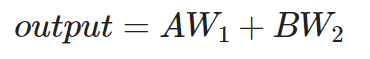

A and B are input so our model will not do anything to them. But weights will be updated. After training we found out that our model set weight_1 to -1 and weight_2 to -2. i.e It is trying to do

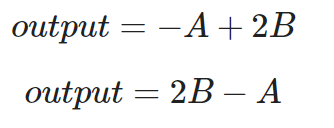



By induction we can prove that if A, B are odd numbers in sequence 2B-A will be also odd numbers and the case is also applicable to even numbers.

In [4]:
## Odd Numbers
import numpy as np
odd_numbers = np.arange(1,1000, 2)

odd_numbers

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311,
       313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337,
       339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 36

In [5]:
## Every third item is set as label and preceeding two are used as input
trainset = list()
labelset = list()
for idx in range(len(odd_numbers) - 2):
    trainset.append(odd_numbers[idx:idx+2])
    labelset.append(odd_numbers[idx+2])
    

trainset = np.array(trainset)
labelset = np.array(labelset)
print(trainset[:10], labelset[:10])

[[ 1  3]
 [ 3  5]
 [ 5  7]
 [ 7  9]
 [ 9 11]
 [11 13]
 [13 15]
 [15 17]
 [17 19]
 [19 21]] [ 5  7  9 11 13 15 17 19 21 23]


In [30]:
input_size = 2
output_size = 1

weights =  np.random.random((input_size, output_size)) - 0.001
weights

array([[0.91947764],
       [0.19977172]])

In [31]:
num_iterations = 100000
lr = 0.000001
for itera in range(num_iterations):
    error = 0
    for idx in range(len(trainset)):
        label = labelset[idx]
        layer_0 = trainset[idx]
        
        output = layer_0.dot(weights)
        
        error = error + (output - label) ** 2
        
        delta_output = output - label
        
        delta_weights = layer_0.reshape(input_size,1).dot(delta_output.reshape(1,output_size))
        
        weights = weights - lr * delta_weights
        
        
        
    if itera % 9999 == 0:    
        print(error/len(trainset))
            

[4.22363294]
[0.22822417]
[0.04764532]
[0.0099467]
[0.00207653]
[0.00043351]
[9.05013228e-05]
[1.88935508e-05]
[3.94432093e-06]
[8.23437995e-07]
[1.71905416e-07]


In [39]:
def predict_next_odd(input_sequence):
    layer_0 = input_sequence   
    output = layer_0.dot(weights)
    
    print("Predicted: {}".format(output))
    return output.round(2)

In [40]:
predict_next_odd(np.array([99, 101]))


Predicted: [102.99867357]


array([103.])

In [41]:
predict_next_odd(np.array([-901, -903]))


Predicted: [-904.99985953]


array([-905.])

In [42]:
predict_next_odd(np.array([501, 503]))


Predicted: [504.99926802]


array([505.])

In [44]:
predict_next_odd(np.array([2001, 2003]))


Predicted: [2005.00148615]


array([2005.])